# Efficient Frontier

## Portfolio return for two stocks

$r=\omega_1 * \mu_1 + \omega_2 * \mu_2$

## Portfolio variance for two stocks

$var = \omega_1^2 * \sigma_1^2 + \omega_2^2 * \sigma_2^2+2*\omega_1*\omega_2*Cov_{1,2}$

In [60]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

### Get data

In [38]:
start_date = '2000-12-01'
end_date = '2020-01-12'
df = yf.download(['AAPL', 'CAT'], start=start_date, end= end_date)

[*********************100%***********************]  2 of 2 completed


### Calculate log return

In [39]:
df = np.log(1+df['Adj Close'].pct_change())

In [40]:
df

,AAPL,CAT
Date,,
2000-11-30,NaN,NaN
2000-12-01,0.033523,0.034379
2000-12-04,-0.022223,0.062520
2000-12-05,0.018554,0.001442
2000-12-06,-0.172080,-0.042685
...,...,...
2020-01-06,0.007937,-0.000674
2020-01-07,-0.004714,-0.013301
2020-01-08,0.015958,0.008842


### Portfolio return for two stocks

$r=\omega_1 * \mu_1 + \omega_2 * \mu_2$

In [33]:
# Assumption equal weights
weights = [0.5,0.5]

In [43]:
def portfolioreturn(df, weights):
    return np.dot(df.mean(), weights)

In [44]:
portfolioreturn(df, weights)

0.0008686145648165986

### Portfolio variance for two stocks

$var = \omega_1^2 * \sigma_1^2 + \omega_2^2 * \sigma_2^2+2*\omega_1*\omega_2*Cov_{1,2}$

### Portfolio standard deviation for two stocks

$std = \sqrt{var}$

In [47]:
def portfoliostd(df, weights):
    return (np.dot(np.dot(df.cov(),weights),weights))**0.5*np.sqrt(250)

In [48]:
portfoliostd(df, weights)

0.28208146494055497

### Simulate different portfolio weights

In [49]:
def weightscreator(df):
    rand=np.random.random(len(df.columns))
    rand /=rand.sum()
    return rand

In [56]:
weightscreator(df)

array([0.6304698, 0.3695302])

### Simulate portfolio returns and standard deviations with simulated weights

In [58]:
returns = []
stds = []
sim_weights =[]

for i in range(1000):
    weights= weightscreator(df)
    returns.append(portfolioreturn(df, weights))
    stds.append(portfoliostd(df, weights))
    sim_weights.append(weights)

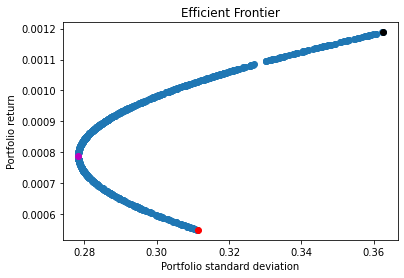

In [70]:
plt.scatter(stds, returns)
# plot Apple and CAT
plt.scatter(df.std().iloc[0]*np.sqrt(250), df.mean().iloc[0], c='k')
plt.scatter(df.std().iloc[1]*np.sqrt(250), df.mean().iloc[1], c='red')
plt.scatter(min(stds), returns[stds.index(min(stds))], c='m')
plt.title('Efficient Frontier')
plt.ylabel('Portfolio return')
plt.xlabel('Portfolio standard deviation')
plt.show()

In [68]:
# calculate point with lowest standard deviation
returnsEfficient= returns[stds.index(min(stds))]

In [72]:
# weights corresponding to efficient frontier
eff_weights = sim_weights[stds.index(min(stds))]

In [73]:
eff_weights

array([0.37527766, 0.62472234])

In [91]:
for i in range(len(df.columns)):
    print(f"{df.columns[i]} Stock, weight {eff_weights[i]}")


AAPL Stock, weight 0.37527766245224936
CAT Stock, weight 0.6247223375477506
